# **Accuration in Classification Comparation Exercise**

1. Carilah data set klasifikasi dengan 2 kelas saja pada target.
2. Tentukan metrics yang ingin digunakan dan alasannya
3. Lakukan data cleaning dan feature engineering yang tepat.
4. Komparasikan model berikut ini:
    - KNN
    - DT Criterion Gini
    - DT Criterion Entrophy
    - LogReg
    - SVC Poly
    - SVC Linear
    - SVC RBF
    - SVC Sigmoid

In [249]:
# Library

#Standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

#Data Pre-Processing
import statsmodels.api as sm
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler

#Data Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Data Output
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix,f1_score
from sklearn.pipeline import Pipeline #menggabungkan proces

warnings.filterwarnings('ignore')

In [250]:
#Defining Function

def dataDescription(df):
    tempList = []
    for col in df.columns:
        tempList.append(
            [col,
            df[col].dtype,
            df[col].isna().sum(),
            round(df[col].isna().sum()/len(df)*100,2),
            df[col].nunique(),
            #list(df[col].drop_duplicates().sample(5,replace=True).values)
            list(df[col].drop_duplicates().sort_values().values)
            ]
        )

    descData = pd.DataFrame(data = tempList,
                            columns = ['Col','Data Type','Missing Value', 'Pct Missing Value','Num Unique','Unique Sample']
                            )
    display(descData)

def normalCheckShapiro(data):

    _, p_value = stats.shapiro(data)

    alpha = 0.05
    if p_value > alpha:
        print("The data is normally distributed.")
    else:
        print("The data is not normally distributed.")


# Data Pre-Processing

In [251]:
df = pd.read_csv('weatherAUS.csv')
display(df.head())
df = df[df['Location']=='MelbourneAirport']

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [252]:
#Descriptive Analysis
display(df.info(),df.describe(),df.isnull().sum(),df.head(),dataDescription(df))

<class 'pandas.core.frame.DataFrame'>
Index: 3009 entries, 64191 to 67199
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3009 non-null   object 
 1   Location       3009 non-null   object 
 2   MinTemp        3009 non-null   float64
 3   MaxTemp        3009 non-null   float64
 4   Rainfall       3009 non-null   float64
 5   Evaporation    3006 non-null   float64
 6   Sunshine       3008 non-null   float64
 7   WindGustDir    2994 non-null   object 
 8   WindGustSpeed  2994 non-null   float64
 9   WindDir9am     2969 non-null   object 
 10  WindDir3pm     2996 non-null   object 
 11  WindSpeed9am   3008 non-null   float64
 12  WindSpeed3pm   3009 non-null   float64
 13  Humidity9am    3001 non-null   float64
 14  Humidity3pm    3000 non-null   float64
 15  Pressure9am    3009 non-null   float64
 16  Pressure3pm    3009 non-null   float64
 17  Cloud9am       3009 non-null   float64
 18  Cloud3pm

,Col,Data Type,Missing Value,Pct Missing Value,Num Unique,Unique Sample
0,Date,object,0,0.00,3009,"[2009-01-01, 2009-01-02, 2009-01-03, 2009-01-0..."
1,Location,object,0,0.00,1,[MelbourneAirport]
2,MinTemp,float64,0,0.00,239,"[-1.0, -0.4, -0.2, 0.0, 0.1, 0.2, 0.4, 0.6, 0...."
3,MaxTemp,float64,0,0.00,308,"[8.4, 9.3, 9.4, 9.6, 9.8, 9.9, 10.0, 10.1, 10...."
4,Rainfall,float64,0,0.00,114,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, ..."
5,Evaporation,float64,3,0.10,101,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1, 1.2, 1.4, ..."
6,Sunshine,float64,1,0.03,140,"[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ..."
7,WindGustDir,object,15,0.50,16,"[E, ENE, ESE, N, NE, NNE, NNW, NW, S, SE, SSE,..."
8,WindGustSpeed,float64,15,0.50,51,"[15.0, 17.0, 19.0, 20.0, 22.0, 24.0, 26.0, 28...."
9,WindDir9am,object,40,1.33,16,"[E, ENE, ESE, N, NE, NNE, NNW, NW, S, SE, SSE,..."


None

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3009.000000,3009.000000,3009.000000,3006.000000,3008.000000,2994.000000,3008.000000,3009.000000,3001.000000,3000.000000,3009.000000,3009.000000,3009.000000,3008.000000,3009.000000,3009.000000
mean,9.973945,20.491858,1.451977,4.644378,6.381283,46.919172,20.278923,23.081422,70.115961,51.171333,1018.087670,1016.279096,5.246261,5.263298,14.124925,18.952077
std,4.481929,6.653313,4.592725,3.337953,3.920440,16.069745,11.677648,9.908878,15.745070,17.831544,7.682523,7.531829,2.535946,2.363076,4.918962,6.438427
min,-1.000000,8.400000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,11.000000,7.000000,989.700000,988.200000,0.000000,0.000000,3.300000,6.200000
25%,6.700000,15.300000,0.000000,2.200000,3.000000,35.000000,11.000000,17.000000,61.000000,40.000000,1013.100000,1011.300000,3.000000,3.000000,10.500000,13.900000
50%,9.500000,19.100000,0.000000,4.000000,6.500000,44.000000,19.000000,22.000000,72.000000,50.000000,1018.300000,1016.700000,7.000000,6.000000,13.500000,17.800000
75%,13.000000,24.500000,0.800000,6.400000,9.600000,57.000000,28.000000,30.000000,81.000000,62.000000,1023.300000,1021.400000,7.000000,7.000000,16.800000,22.800000
max,30.500000,46.800000,75.800000,23.800000,13.900000,122.000000,67.000000,76.000000,100.000000,98.000000,1039.300000,1036.000000,8.000000,8.000000,35.400000,46.100000


Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       3
Sunshine          1
WindGustDir      15
WindGustSpeed    15
WindDir9am       40
WindDir3pm       13
WindSpeed9am      1
WindSpeed3pm      0
Humidity9am       8
Humidity3pm       9
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          1
Temp9am           0
Temp3pm           0
RainToday         0
RainTomorrow      0
dtype: int64

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
64191,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,...,55.0,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes
64192,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,...,50.0,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No
64193,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,...,51.0,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No
64194,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,...,67.0,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No
64195,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,...,51.0,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No


None

In [253]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#month = df['month'].astype(str).str[5:7]
df.insert(1,'month',df['Date'].astype(str).str[5:7])
df['month'] = df['month'].astype(float)

In [254]:
df.dropna(inplace=True)

In [255]:
df.columns

Index(['Date', 'month', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [256]:
def Avg(var1,var2):
    return df[var1]+df[var2]

In [257]:
df['AvgWindSpeed'] = Avg('WindSpeed9am','WindSpeed3pm')
df['AvgHumidity'] = Avg('Humidity9am','Humidity3pm')
df['AvgPressure'] = Avg('Pressure9am','Pressure3pm')
df['AvgCloud'] = Avg('Cloud9am','Cloud3pm')
df['AvgTemp'] = Avg('Temp9am','Temp3pm')

# Defining Features

In [258]:
x = df.drop(columns=['Date','Location','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTomorrow'])
y = np.where(df['RainTomorrow'] == 'Yes', 1, 0)

In [259]:
x

,month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,AvgWindSpeed,AvgHumidity,AvgPressure,AvgCloud,AvgTemp
64191,1.0,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,No,76.0,92.0,2011.5,14.0,34.0
64192,1.0,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,Yes,57.0,93.0,2037.3,13.0,28.3
64193,1.0,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,No,32.0,86.0,2038.4,8.0,33.0
64194,1.0,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,No,22.0,90.0,2029.0,9.0,44.2
64195,1.0,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,No,29.0,82.0,2022.2,8.0,46.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67195,6.0,7.7,13.2,0.2,0.6,0.0,N,37.0,W,S,No,22.0,175.0,2057.7,14.0,21.9
67196,6.0,2.4,13.0,0.0,0.6,0.0,N,39.0,N,N,No,36.0,138.0,2053.6,14.0,20.3
67197,6.0,5.5,13.2,0.0,1.6,6.0,N,57.0,NNW,N,No,54.0,134.0,2032.7,8.0,20.8
67198,6.0,5.7,12.6,1.2,1.8,5.6,SW,33.0,W,W,Yes,24.0,130.0,2036.4,9.0,19.2


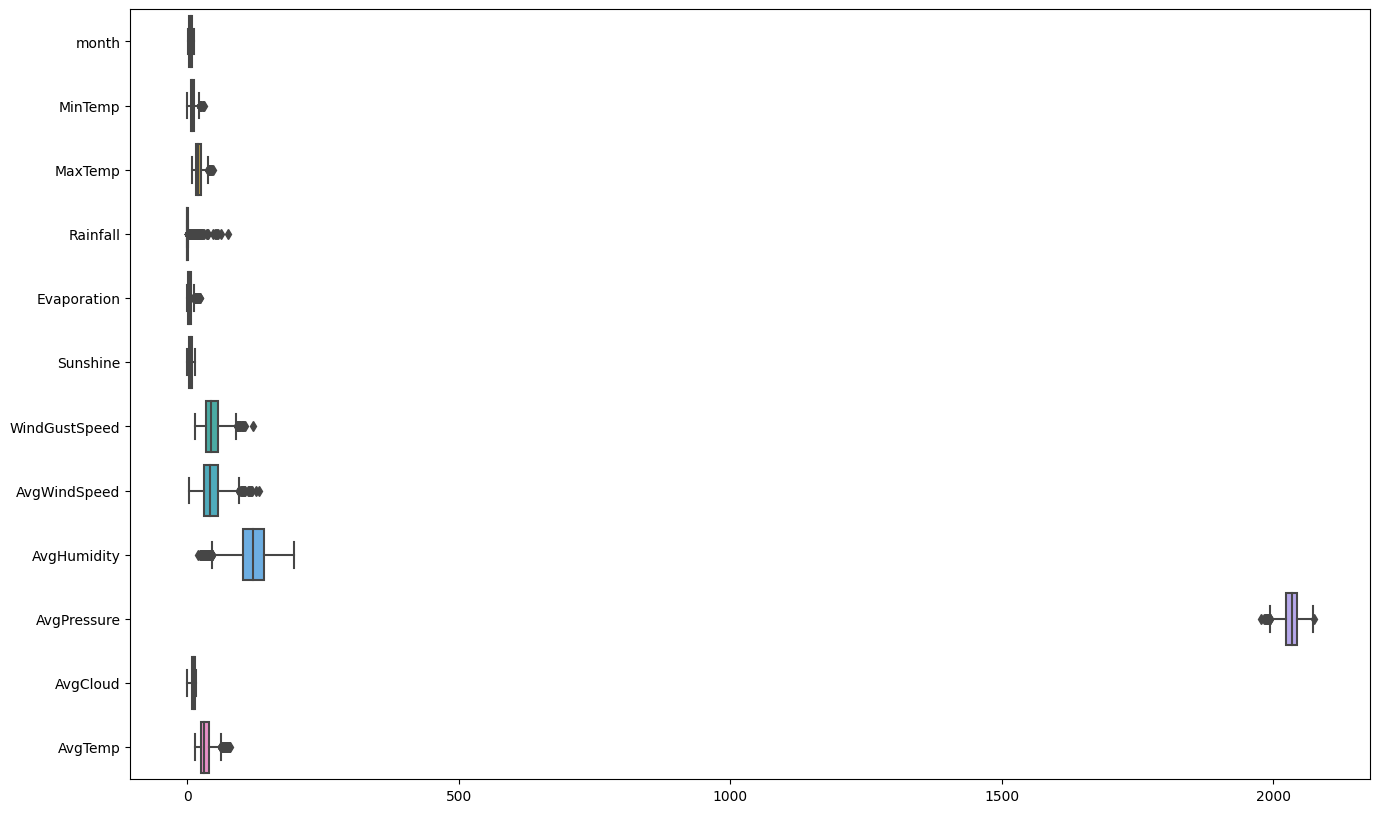

In [260]:
plt.figure(figsize=(16,10))
sns.boxplot(
    data=x,
    orient='h'
)
plt.show()

Strategi PreProcessing:

1. BinaryEncoder: 'WindGustDir','WindDir9am','WindDir3pm'
One Hot Encoder: 'RainToday'

2. Scaling
    - MinMax = 'month', 'Sunshine'
    - StandardScaler = 'MinTemp','MaxTemp', 'Evaporation', 'WindGustSpeed', 'AvgHumidity', 'AvgPressure', 'AvgCloud'
    - RobustScaler = 'Rainfall', 'AvgWindSpeed', 'AvgTemp'


In [261]:
transformer = ColumnTransformer(
    [
        ('BinaryEncode',ce.BinaryEncoder(),['WindGustDir','WindDir9am','WindDir3pm']),
        ('OneHotEncode',ce.OneHotEncoder(),['RainToday']),
        ('minMaxScale',MinMaxScaler(),['month', 'Sunshine']),
        ('StandardScale',StandardScaler(),['MinTemp','MaxTemp', 'Evaporation', 'WindGustSpeed', 'AvgHumidity', 'AvgPressure', 'AvgCloud']),
        ('RobustScale',RobustScaler(),['Rainfall', 'AvgWindSpeed', 'AvgTemp'])
    ],
    remainder='passthrough' #LEWATKAN YANG GAK DIMENTION
)

In [262]:
#DATA SPLITING
xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    stratify= y,
    random_state=1000,
    test_size= 0.2
)


In [263]:
# Fit and Transforming Data
xtrain_prepros = transformer.fit_transform(xtrain)
xtest_prepros = transformer.transform(xtest)

xtrain_prepros = pd.DataFrame(xtrain_prepros)
xtest_prepros = pd.DataFrame(xtest_prepros)

xtrain_prepros

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.270188,-0.678694,-0.679076,0.976658,0.057911,0.748247,0.855228,0.75,0.653846,-0.366667
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.131296,-0.799850,-0.203107,0.413251,0.291623,-0.469715,0.608758,0.75,1.038462,-0.466667
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.116407,1.002353,-0.143611,0.976658,-0.175801,-2.095894,-0.870060,13.75,1.038462,1.293333
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.086686,-0.693838,-1.333533,-1.715177,0.959372,1.129696,0.608758,1.25,-0.884615,-0.326667
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-1.251591,-0.996730,-0.798068,-0.400560,0.091299,0.547484,-0.623590,0.00,0.115385,-0.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.488170,-0.496959,-1.214541,-0.901366,1.193084,0.152650,0.608758,10.75,-0.500000,-0.153333
2339,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.917022,-1.451066,-0.798068,2.228674,-0.109026,-0.342565,-2.102408,2.75,0.346154,-0.993333
2340,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,-0.292492,-0.133489,0.927319,0.601053,-0.409513,-0.831088,0.362288,1.00,1.269231,-0.020000
2341,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,-0.180969,-0.814995,-0.857564,0.162848,0.124686,-0.155186,0.608758,3.50,0.730769,-0.373333


In [264]:
feature = list(transformer.transformers_[0][1].get_feature_names_out()) + list(transformer.transformers_[1][1].get_feature_names_out()) + list(transformer.transformers_[2][1].get_feature_names_out()) + list(transformer.transformers_[3][1].get_feature_names_out()) + list(transformer.transformers_[4][1].get_feature_names_out()) 
xtrain_prepros.columns = feature
xtest_prepros.columns = feature

xtrain_prepros.head()

,WindGustDir_0,WindGustDir_1,WindGustDir_2,WindGustDir_3,WindGustDir_4,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,...,MinTemp,MaxTemp,Evaporation,WindGustSpeed,AvgHumidity,AvgPressure,AvgCloud,Rainfall,AvgWindSpeed,AvgTemp
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.270188,-0.678694,-0.679076,0.976658,0.057911,0.748247,0.855228,0.75,0.653846,-0.366667
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.131296,-0.799850,-0.203107,0.413251,0.291623,-0.469715,0.608758,0.75,1.038462,-0.466667
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.116407,1.002353,-0.143611,0.976658,-0.175801,-2.095894,-0.870060,13.75,1.038462,1.293333
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.086686,-0.693838,-1.333533,-1.715177,0.959372,1.129696,0.608758,1.25,-0.884615,-0.326667
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-1.251591,-0.996730,-0.798068,-0.400560,0.091299,0.547484,-0.623590,0.00,0.115385,-0.733333


## KNN

In [265]:
k = range(3,50,2)

train_score = []
test_score= []
scoreKNN = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain_prepros,ytrain)

    ypred_train = knn.predict(xtrain_prepros)
    train_score.append(accuracy_score(ytrain,ypred_train))

    ypred_test = knn.predict(xtest_prepros)
    acc_score = accuracy_score(ytest,ypred_test)
    test_score.append(acc_score)

    if scoreKNN < acc_score:
        scoreKNN = acc_score
        best_k = i
    

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(xtrain_prepros,ytrain)

ypred_train = knn.predict(xtrain_prepros)

ypred_test = knn.predict(xtest_prepros) 
recall_scoreKNN = recall_score(ytest,ypred_test)

trainScoreFinalKNN = accuracy_score(ytrain,ypred_train)

f1_scoreKNN = f1_score(ytest,ypred_test)

print (f'Best K: {best_k}\nPred Score: {trainScoreFinalKNN*100}%\nAcc Score: {scoreKNN*100}%\nRecall Score: {recall_scoreKNN}\nf1 Score: {f1_scoreKNN}')


Best K: 7
Pred Score: 84.67776355100298%
Acc Score: 82.25255972696246%
Recall Score: 0.31496062992125984
f1 Score: 0.4347826086956522


## DT Gini

In [266]:
depths = range(3,50)
testing_accuracies = []
training_accuracies = []
scoreDTG = 0


for i in depths:
    tree = DecisionTreeClassifier(criterion = 'gini', max_depth = i)
    tree.fit(xtrain_prepros,ytrain)

    y_predict_train = tree.predict(xtrain_prepros)
    training_accuracies.append(accuracy_score(ytrain,y_predict_train))

    y_predict_test = tree.predict(xtest_prepros)
    acc_score = accuracy_score(ytest,y_predict_test)
    testing_accuracies.append(acc_score)

    if scoreDTG < acc_score:
        best_depth = i
        scoreDTG = acc_score

tree = DecisionTreeClassifier(criterion = 'gini', max_depth = best_depth)
tree.fit(xtrain_prepros,ytrain)

y_predict_train = tree.predict(xtrain_prepros)

y_predict_test = tree.predict(xtest_prepros)
recall_scoreDT_Gini = recall_score(ytest,y_predict_test)

trainScoreFinalDTG = accuracy_score(ytrain,y_predict_train)

f1_scoreDTG = f1_score(ytest,y_predict_test)

print (f'Best Depth: {best_depth}\nPred Score: {trainScoreFinalDTG*100}%\nAcc Score: {scoreDTG*100}%\nRecall Score: {recall_scoreDT_Gini}\nf1 Score: {f1_scoreDTG}')

Best Depth: 3
Pred Score: 83.90951771233462%
Acc Score: 82.5938566552901%
Recall Score: 0.3779527559055118
f1 Score: 0.4848484848484849


## DT Entropy

In [267]:
depths = range(3,50)
testing_accuracies = []
training_accuracies = []
scoreDTE = 0


for i in depths:
    tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
    tree.fit(xtrain_prepros,ytrain)

    y_predict_train = tree.predict(xtrain_prepros)
    training_accuracies.append(accuracy_score(ytrain,y_predict_train))

    y_predict_test = tree.predict(xtest_prepros)
    acc_score = accuracy_score(ytest,y_predict_test)
    testing_accuracies.append(acc_score)

    if scoreDTE < acc_score:
        best_depth = i
        scoreDTE = acc_score

tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = best_depth)
tree.fit(xtrain_prepros,ytrain)

y_predict_train = tree.predict(xtrain_prepros)

y_predict_test = tree.predict(xtest_prepros)
recall_scoreDTE = recall_score(ytest,y_predict_test)

trainScoreFinalDTE = accuracy_score(ytrain,y_predict_train)

f1_scoreDTE = f1_score(ytest,y_predict_test)

print (f'Best Depth: {best_depth}\nPred Score: {trainScoreFinalDTE*100}%\nAcc Score: {scoreDTE*100}%\nRecall Score: {recall_scoreDTE}\nf1 Score: {f1_scoreDTE}')

Best Depth: 4
Pred Score: 83.69611609048229%
Acc Score: 82.08191126279864%
Recall Score: 0.4015748031496063
f1 Score: 0.4927536231884058


## LogReg

In [268]:
# Get Best Model

logreg = LogisticRegression()

logreg.fit(xtrain_prepros,ytrain)

y_predict_train = logreg.predict(xtrain_prepros)
trainScoreFinalLogReg = accuracy_score(ytrain,y_predict_train)

y_predict_test = logreg.predict(xtest_prepros)
scoreLogReg = accuracy_score(ytest,y_predict_test)

recall_scoreLogReg = recall_score(ytest,y_predict_test)

f1_scoreLogReg = f1_score(ytest,y_predict_test)

print (f'Pred Score: {trainScoreFinalLogReg*100}%\nAcc Score: {scoreLogReg*100}%\nRecall Score: {recall_scoreLogReg}\nf1 Score: {f1_scoreLogReg}')

Pred Score: 84.1655996585574%
Acc Score: 81.56996587030717%
Recall Score: 0.4094488188976378
f1 Score: 0.49056603773584906


## SVC Poly

In [269]:
#kernel = ['sigmoid', 'rbf', 'poly', 'linear']
testing_accuracies = []
training_accuracies = []

scoreSVC = 0

SVM = SVC(kernel='poly')
SVM.fit(xtrain_prepros,ytrain)

y_predict_train = SVM.predict(xtrain_prepros)
trainScoreFinalSVCPoly = accuracy_score(ytrain,y_predict_train)

y_predict_test = SVM.predict(xtest_prepros)
scoreSVCPoly = accuracy_score(ytest,y_predict_test)


recall_scoreSVMPoly = recall_score(ytest,y_predict_test)

f1_scoreSVCPoly = f1_score(ytest,y_predict_test)


print (f'Pred Score: {trainScoreFinalSVCPoly*100}%\nAcc Score: {scoreSVCPoly*100}%\nRecall Score: {recall_scoreSVMPoly}\nf1 Score: {f1_scoreSVCPoly}')

Pred Score: 82.33034571062741%
Acc Score: 81.56996587030717%
Recall Score: 0.1889763779527559
f1 Score: 0.3076923076923077


## SVC Linear

In [270]:
#kernel = ['sigmoid', 'rbf', 'poly', 'linear']
testing_accuracies = []
training_accuracies = []

scoreSVC = 0

SVM = SVC(kernel='linear')
SVM.fit(xtrain_prepros,ytrain)

y_predict_train = SVM.predict(xtrain_prepros)
trainScoreFinalSVCLinear = accuracy_score(ytrain,y_predict_train)

y_predict_test = SVM.predict(xtest_prepros)
scoreSVCLinear = accuracy_score(ytest,y_predict_test)


recall_scoreSVMLinear = recall_score(ytest,y_predict_test)

f1_scoreSVCLinear = f1_score(ytest,y_predict_test)


print (f'Pred Score: {trainScoreFinalSVCLinear*100}%\nAcc Score: {scoreSVCLinear*100}%\nRecall Score: {recall_scoreSVMLinear}\nf1 Score: {f1_scoreSVCLinear}')

Pred Score: 84.08023900981647%
Acc Score: 81.22866894197952%
Recall Score: 0.36220472440944884
f1 Score: 0.45544554455445546


## SVC RBF

In [271]:
#kernel = ['sigmoid', 'rbf', 'poly', 'linear']
testing_accuracies = []
training_accuracies = []

scoreSVC = 0

SVM = SVC(kernel='rbf')
SVM.fit(xtrain_prepros,ytrain)

y_predict_train = SVM.predict(xtrain_prepros)
trainScoreFinalSVCrbf = accuracy_score(ytrain,y_predict_train)

y_predict_test = SVM.predict(xtest_prepros)
scoreSVCrbf = accuracy_score(ytest,y_predict_test)


recall_scoreSVMrbf = recall_score(ytest,y_predict_test)

f1_scoreSVCrbf = f1_score(ytest,y_predict_test)

print (f'Pred Score: {trainScoreFinalSVCrbf*100}%\nAcc Score: {scoreSVCrbf*100}%\nRecall Score: {recall_scoreSVMrbf}\nf1 Score: {f1_scoreSVCrbf}')

Pred Score: 85.10456679470764%
Acc Score: 83.44709897610922%
Recall Score: 0.33070866141732286
f1 Score: 0.4640883977900553


## SVC Sigmoid

In [272]:
#kernel = ['sigmoid', 'rbf', 'poly', 'linear']
testing_accuracies = []
training_accuracies = []

scoreSVC = 0

SVM = SVC(kernel='sigmoid')
SVM.fit(xtrain_prepros,ytrain)

y_predict_train = SVM.predict(xtrain_prepros)
trainScoreFinalSVCsigmoid = accuracy_score(ytrain,y_predict_train)

y_predict_test = SVM.predict(xtest_prepros)
scoreSVCsigmoid = accuracy_score(ytest,y_predict_test)


recall_scoreSVMsigmoid = recall_score(ytest,y_predict_test)

f1_scoreSVCSigmoid = f1_score(ytest,y_predict_test)


print (f'Pred Score: {trainScoreFinalSVCsigmoid*100}%\nAcc Score: {scoreSVCsigmoid*100}%\nRecall Score: {recall_scoreSVMsigmoid}\nf1 Score: {f1_scoreSVCSigmoid}')

Pred Score: 74.7332479726846%
Acc Score: 73.72013651877133%
Recall Score: 0.30708661417322836
f1 Score: 0.33620689655172414


# CONCLUSION

In [282]:
pd.DataFrame({
    'Model' : ['KNN', 'DT Gini','DT Entrophy','LogReg','SVC Poly','SVC Linear','SVC RBF','SVC Sigmoid'],
    'Predict Score' : [trainScoreFinalKNN,trainScoreFinalDTG,trainScoreFinalDTE,trainScoreFinalLogReg,trainScoreFinalSVCPoly,trainScoreFinalSVCLinear,trainScoreFinalSVCrbf,trainScoreFinalSVCsigmoid],
    'Accuracy Score' : [scoreKNN,scoreDTG,scoreDTE,scoreLogReg,scoreSVCPoly,scoreSVCLinear,scoreSVCrbf,scoreSVCsigmoid],
    'Recall Score' : [recall_scoreKNN,recall_scoreDT_Gini,recall_scoreDTE,recall_scoreLogReg,recall_scoreSVMPoly,recall_scoreSVMLinear,recall_scoreSVMrbf,recall_scoreSVMsigmoid],
    'F-1 Score': [f1_scoreKNN,f1_scoreDTG,f1_scoreDTE,f1_scoreLogReg,f1_scoreSVCPoly,f1_scoreSVCLinear,f1_scoreSVCrbf,f1_scoreSVCSigmoid]
}).sort_values('F-1 Score', ascending=False).reset_index(drop=True).set_index(np.arange(1,9))

,Model,Predict Score,Accuracy Score,Recall Score,F-1 Score
1,DT Entrophy,0.836961,0.820819,0.401575,0.492754
2,LogReg,0.841656,0.815700,0.409449,0.490566
3,DT Gini,0.839095,0.825939,0.377953,0.484848
4,SVC RBF,0.851046,0.834471,0.330709,0.464088
5,SVC Linear,0.840802,0.812287,0.362205,0.455446
6,KNN,0.846778,0.822526,0.314961,0.434783
7,SVC Sigmoid,0.747332,0.737201,0.307087,0.336207
8,SVC Poly,0.823303,0.815700,0.188976,0.307692


Conclusion : **Berdasrkan F-1 Score, Decission Tree dengan Criterion Entrophy meruapakan Best Model untuk dataset di atas.**